In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import piflib.pif_calculator as pif
from tqdm import tqdm

### Investigating 3 data sets from OpenNeuro for data privacy risk assesment.

#### Dataset: 1 
https://openneuro.org/datasets/ds004215/versions/1.0.3<br>
**Titel:** *The National Institute of Mental Health (NIMH) Intramural Healthy Volunteer Dataset*


#### Dataset 2
https://openneuro.org/datasets/ds004856/versions/1.0.4/file-display/participants.json<br>
**Titel:** *The Dallas Lifespan Brain Study*

#### Dataset 3
https://openneuro.org/datasets/ds003097/versions/1.2.1<br>
**Titel**: *AOMIC-ID1000*

## Accessing datasets from OpenNeuro and selecting appropiate quasi-identifers.

In [2]:
#The National Institute of Mental Health (NIMH) Intramural Healthy Volunteer Dataset
url_dataset1 = 'https://s3.amazonaws.com/openneuro.org/ds004215/phenotype/demographics.tsv?versionId=nZFFC5xN_t5XpPisGXe4lVq_dBby1.zw'
df1 = pd.read_csv(url_dataset1, sep='\t')
df1 = df1[['AGE','GENDER','LGBT_IDENTITY','RACE_1','ETHNICITY_1','EDUCATION', 'MARITAL_STATUS', 'INCOME', 'EMPLOYMENT','WORK_NIH_CAMPUS','LANGUAGE']]
rows, columns = df1.shape
print(f"Number of rows: {rows}")
print(f"Number of Quasi-Identifiers: {columns}")
df1.head(3)

Number of rows: 1090
Number of Quasi-Identifiers: 11


,AGE,GENDER,LGBT_IDENTITY,RACE_1,ETHNICITY_1,EDUCATION,MARITAL_STATUS,INCOME,EMPLOYMENT,WORK_NIH_CAMPUS,LANGUAGE
0,25,2,0,2,0,3,1,9,2,0,english
1,33,2,0,5,0,3,2,9,4,-999,English
2,28,2,0,6,1,3,1,6,0,0,English


In [3]:
#The Dallas Lifespan Brain Study 
# Age is from 2008
url_dataset2 = 'https://s3.amazonaws.com/openneuro.org/ds004856/participants.tsv?versionId=IwNXA1rR0LIzEtfMB3kPETHQpZzbovbu'
df2 = pd.read_csv(url_dataset2, sep='\t')
df2 = df2[['AgeCog_W1','Sex', 'Race', 'Ethnicity','EduYrsEstCap', 'EduComp', 'HandednessScore', 'Height_W1']]
df2.fillna(-999, inplace=True)
rows, columns = df2.shape
print(f"Number of rows: {rows}")
print(f"Number of Quasi-Identifiers: {columns}")
df2.to_csv('dataset2.csv')
df2.head()

Number of rows: 464
Number of Quasi-Identifiers: 8


,AgeCog_W1,Sex,Race,Ethnicity,EduYrsEstCap,EduComp,HandednessScore,Height_W1
0,54,m,5,0.0,15.0,3.0,4.000,68.5
1,73,m,5,0.0,18.0,6.0,3.545,68.0
2,22,m,2,0.0,16.0,4.0,4.000,64.0
3,44,f,5,0.0,18.0,6.0,3.727,67.0
4,70,m,5,0.0,14.0,3.0,3.364,72.0


In [4]:
#AOMIC-ID1000
url_dataset3 = 'https://s3.amazonaws.com/openneuro.org/ds003097/participants.tsv?versionId=9gylMj_lF7dOQFiiUSuQ4OeHtgxzGUtv'
df3 = pd.read_csv(url_dataset3, sep='\t')
df3 = df3[['age', 'sex', 'handedness', 'education_level', 'BMI', 'religious_now','religious_upbringing','religious_importance','background_SES','sexual_attraction_M', 'sexual_attraction_F', 'gender_identity_M',
       'gender_identity_F']]
df3['age'] = df3['age'].round(0).astype(int)
df3.fillna(-999, inplace=True)
rows, columns = df3.shape
print(f"Number of rows: {rows}")
print(f"Number of Quasi-Identifiers: {columns}")
df3.to_csv('dataset3.csv')
df3.head()


Number of rows: 928
Number of Quasi-Identifiers: 13


,age,sex,handedness,education_level,BMI,religious_now,religious_upbringing,religious_importance,background_SES,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F
0,22,female,right,medium,23,yes,no,2.0,2.0,7.0,1.0,1.0,7.0
1,22,female,right,medium,20,no,no,-999.0,5.5,7.0,1.0,2.0,7.0
2,25,female,right,high,31,no,no,-999.0,3.0,6.0,3.0,1.0,6.0
3,22,female,right,high,20,no,yes,-999.0,5.0,6.0,2.0,1.0,7.0
4,22,male,right,high,23,no,no,-999.0,4.5,1.0,7.0,6.0,1.0


## Looking at individual column distribution.

## DATA 1

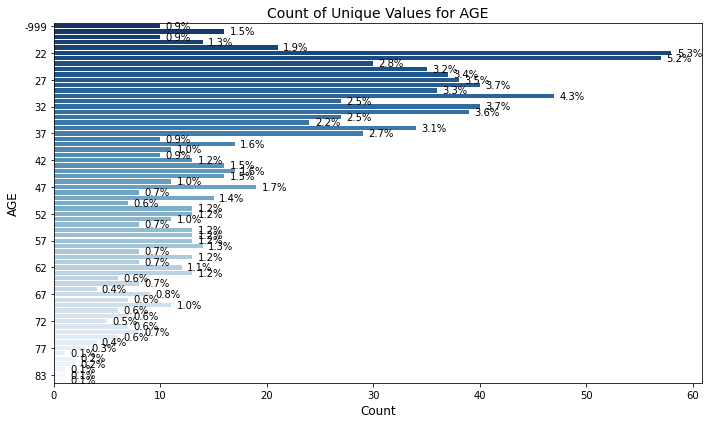

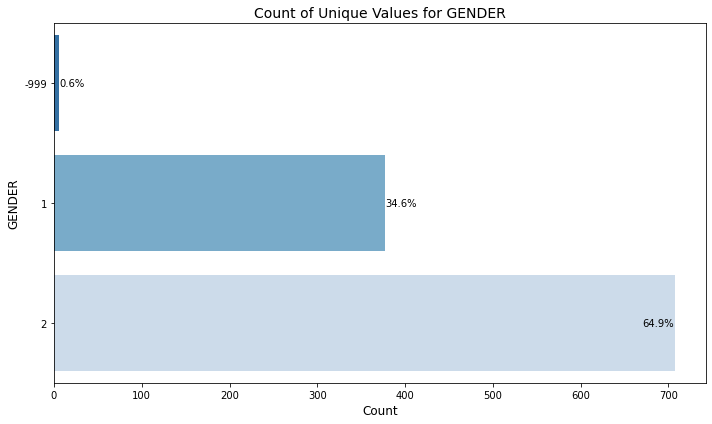

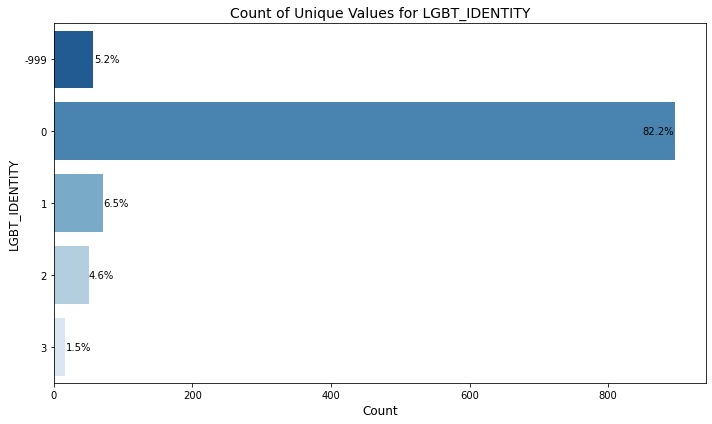

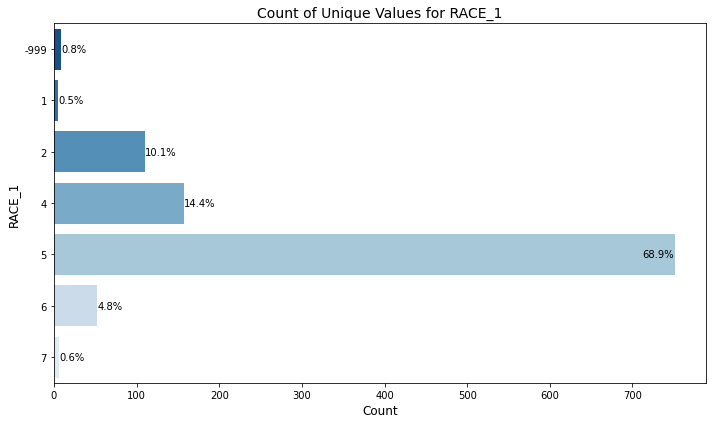

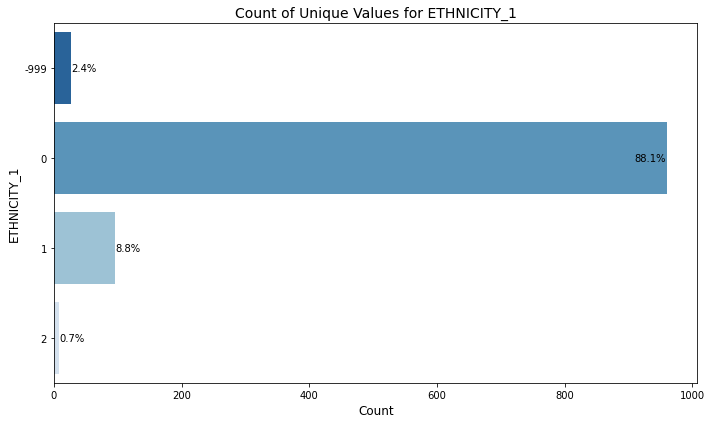

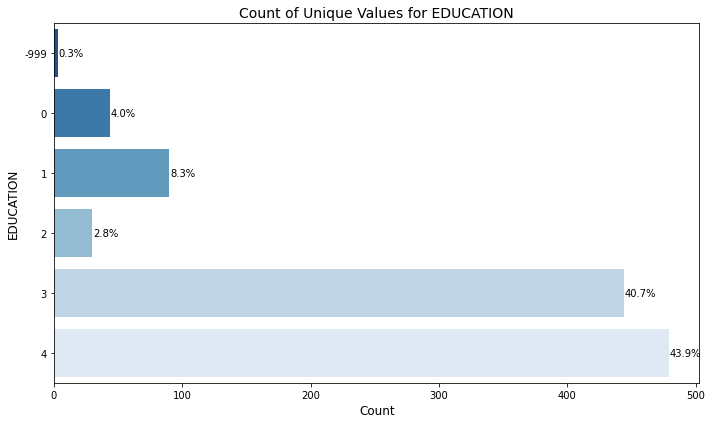

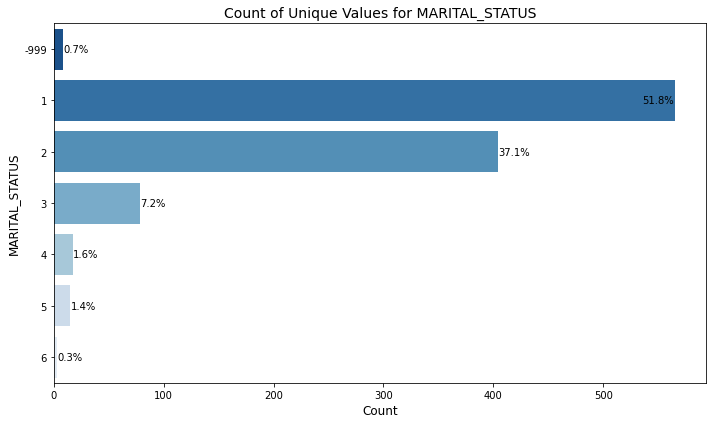

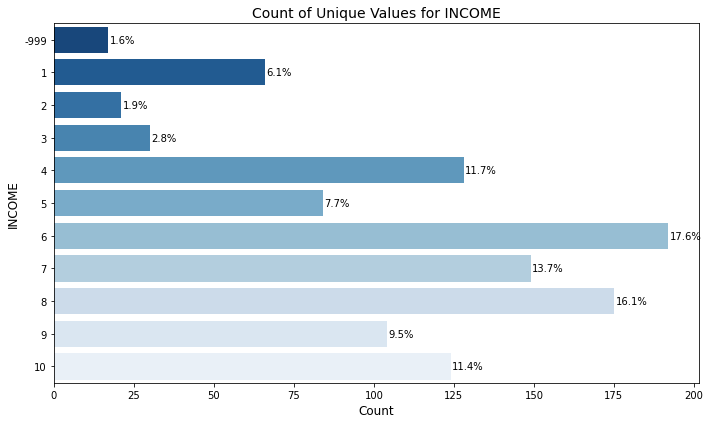

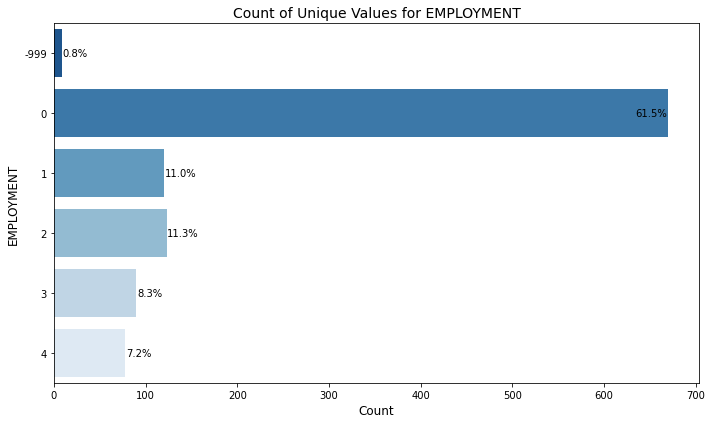

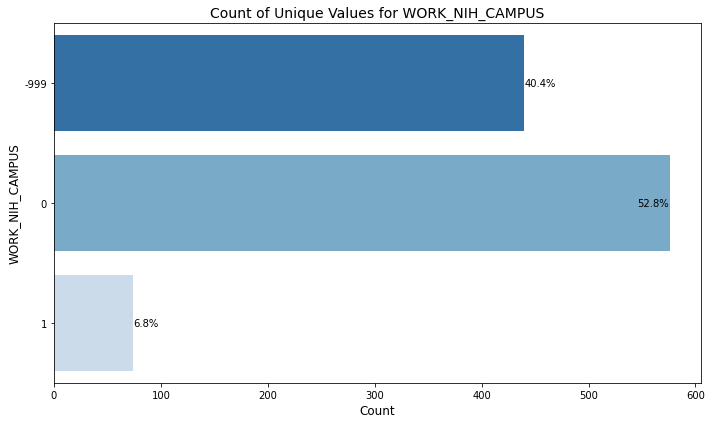

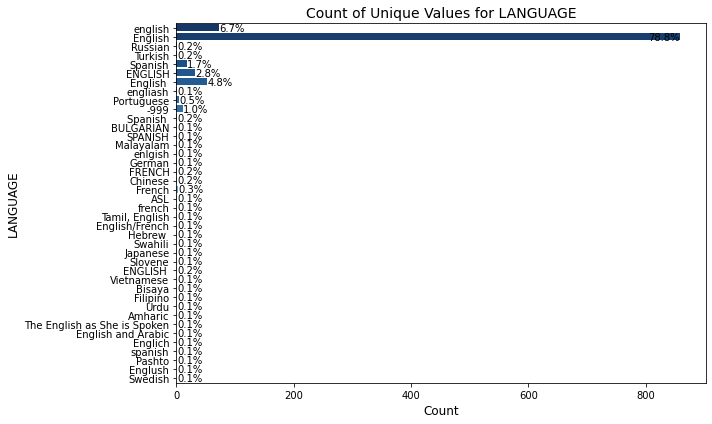

In [5]:

for col in df1.columns:
    plt.figure(figsize=(10, 6))     
    ax = sns.countplot(y=col, data=df1, palette="Blues_r") 
    
    plt.title(f'Count of Unique Values for {col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)  
    total = len(df1[col])
    
    for p in ax.patches:
        count = int(p.get_width()) 
        percentage = f'{100 * count / total:.1f}%'

     
        if p.get_width() > total * 0.5:  
            ax.text(p.get_width() - 1, p.get_y() + p.get_height() / 2, percentage, 
                    ha='right', va='center', fontsize=10, color='black')  
        else:
            ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, percentage, 
                    ha='left', va='center', fontsize=10, color='black') 
    
    if col == 'AGE':
        locs, labels = plt.yticks()
        plt.yticks(locs[::5], labels[::5], fontsize=5)  

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

## DATA 2 

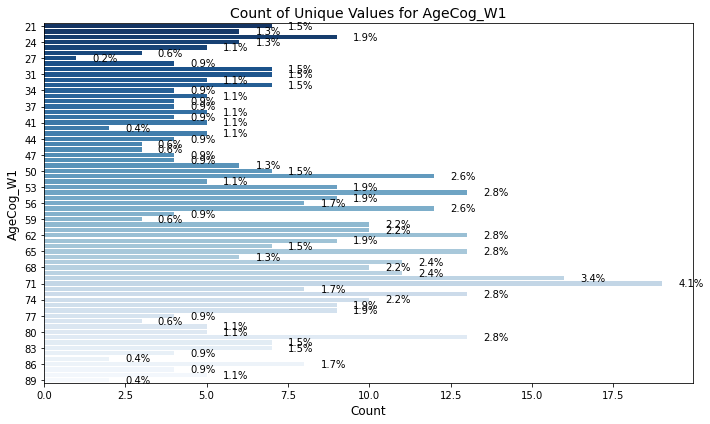

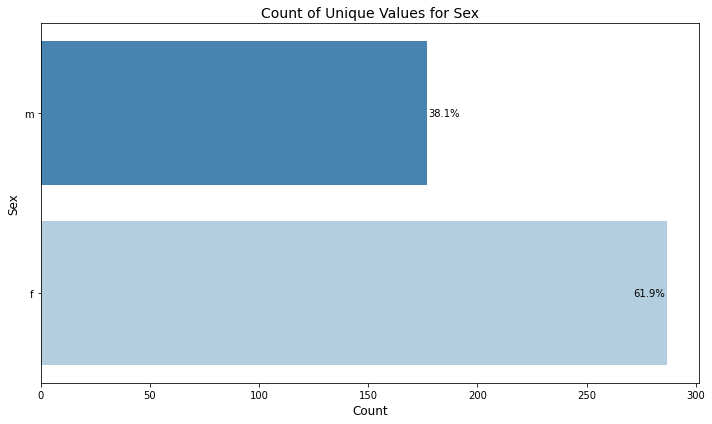

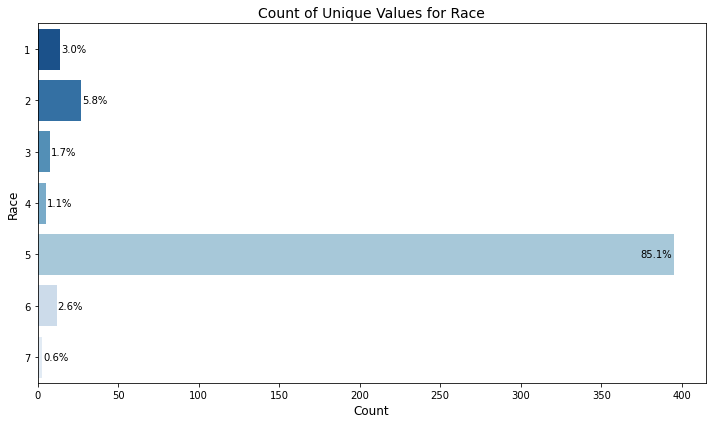

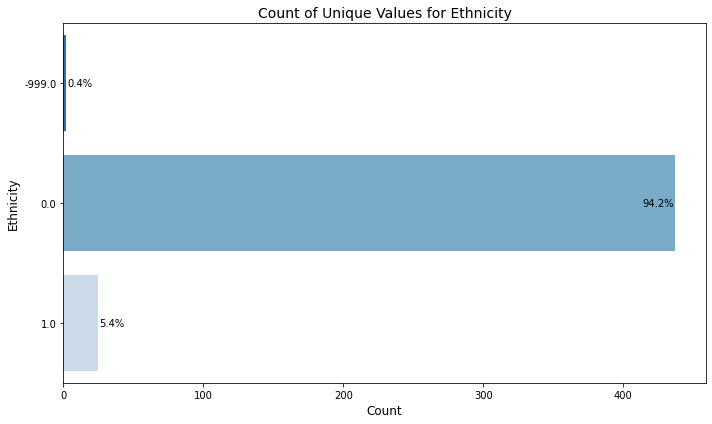

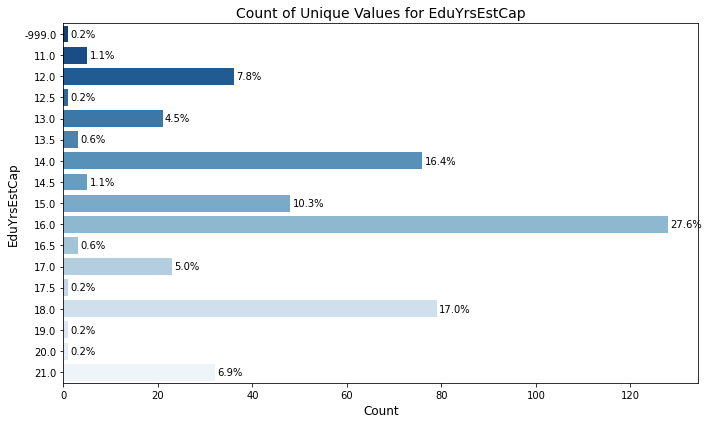

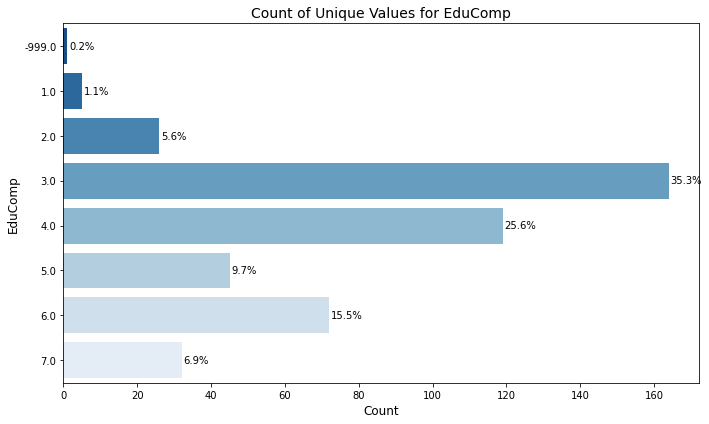

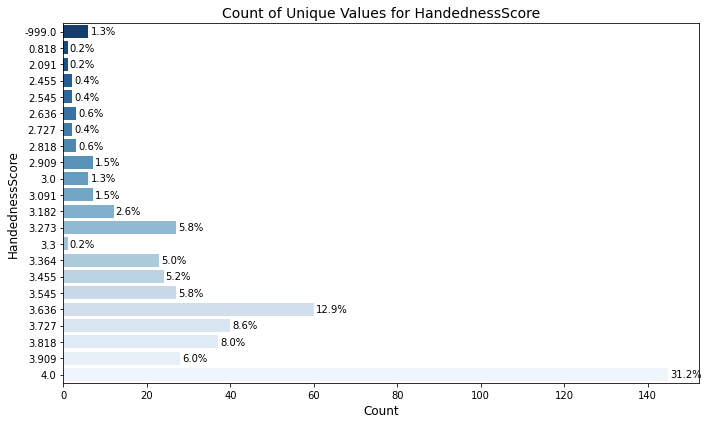

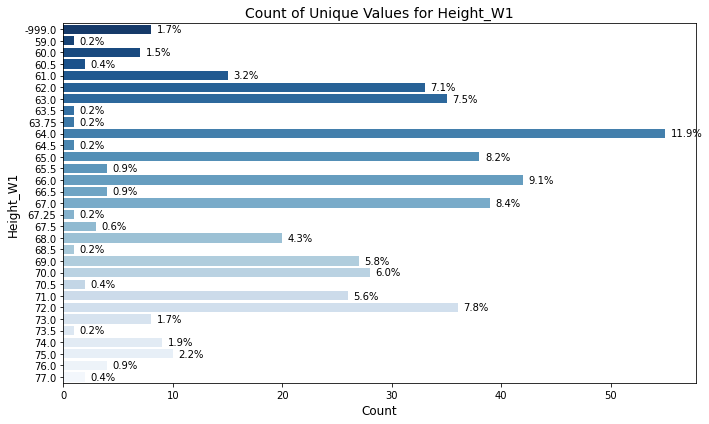

In [6]:
for col in df2.columns:
    plt.figure(figsize=(10, 6))   
    ax = sns.countplot(y=col, data=df2, palette="Blues_r")   
    plt.title(f'Count of Unique Values for {col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    total = len(df2[col])
    
   
    for p in ax.patches:
        count = int(p.get_width()) 
        percentage = f'{100 * count / total:.1f}%'  

       
        if p.get_width() > total * 0.5:
            ax.text(p.get_width() - 1, p.get_y() + p.get_height() / 2, percentage, 
                    ha='right', va='center', fontsize=10, color='black') 
        else:
            ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, percentage, 
                    ha='left', va='center', fontsize=10, color='black') 
    
   
    if col == 'AgeCog_W1':
        locs, labels = plt.yticks()
        plt.yticks(locs[::3], labels[::3], fontsize=10)
  
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

## DATA 3

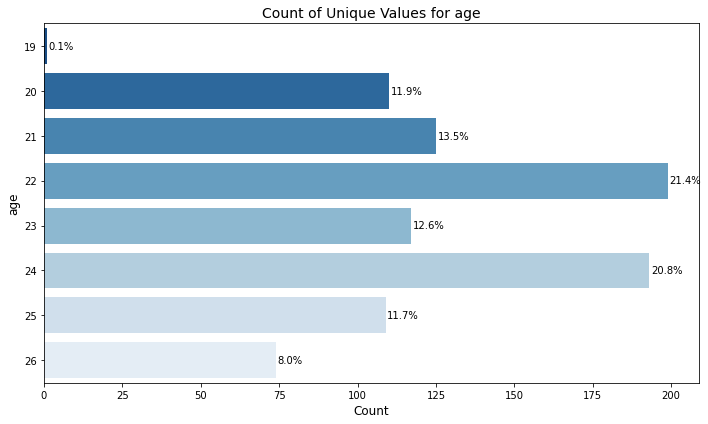

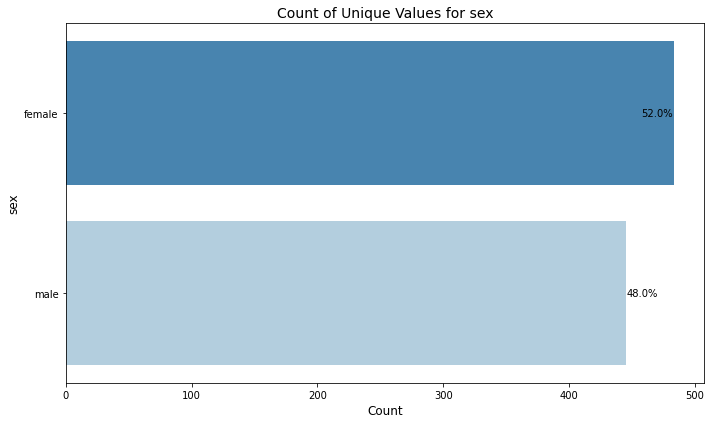

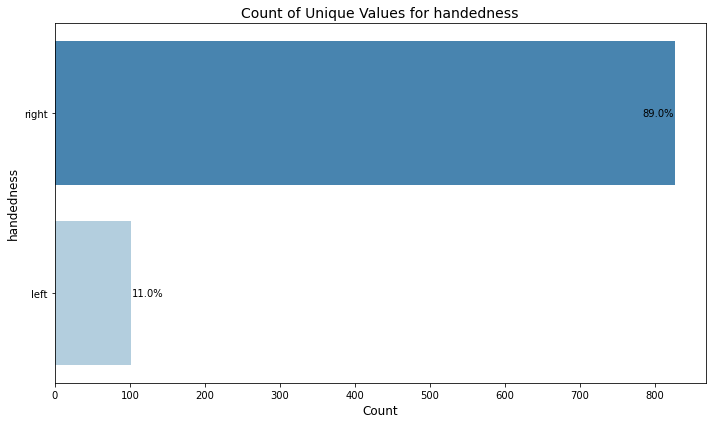

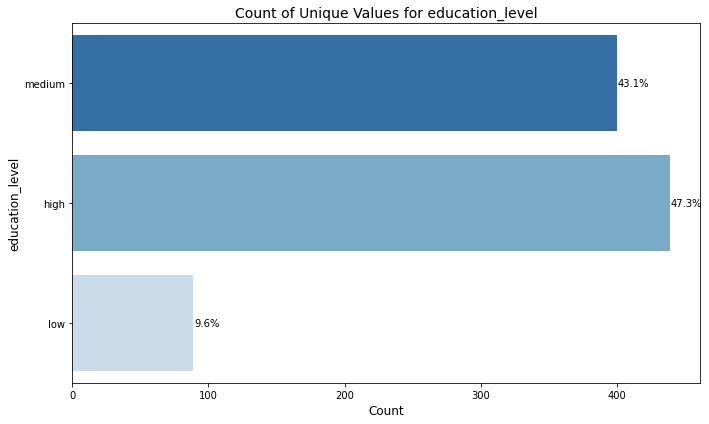

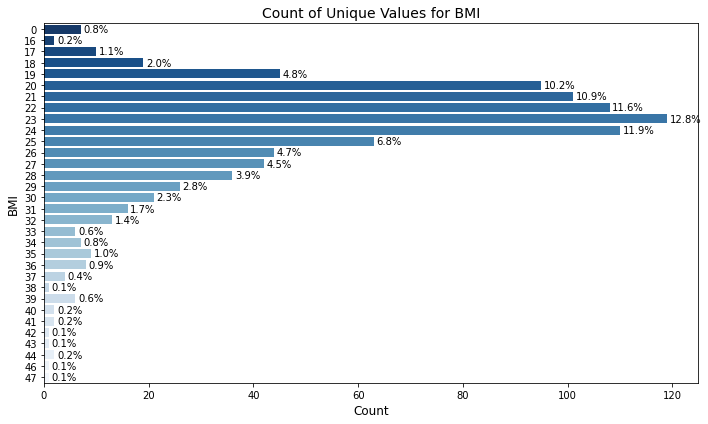

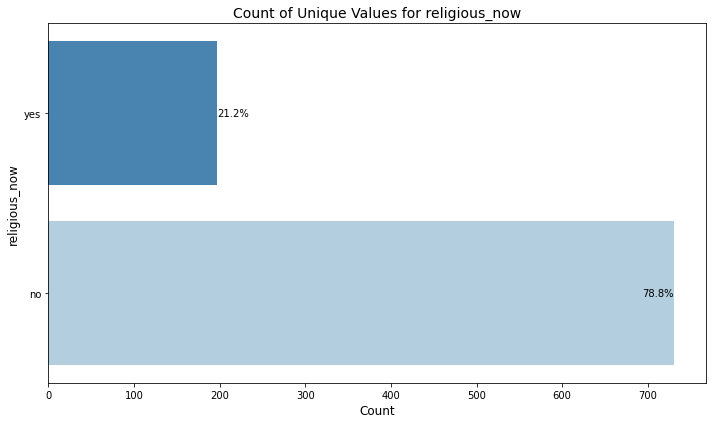

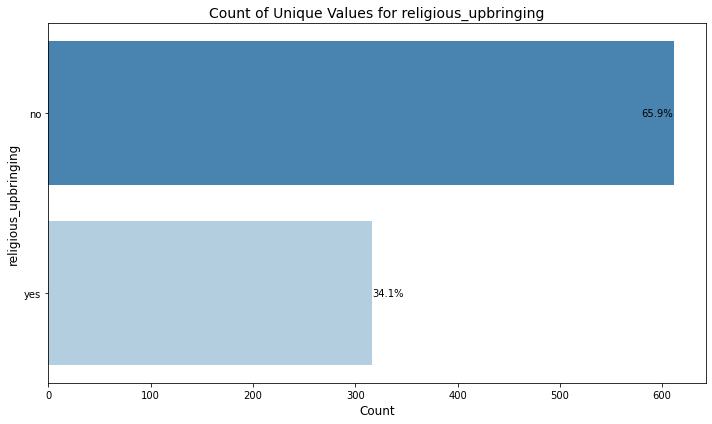

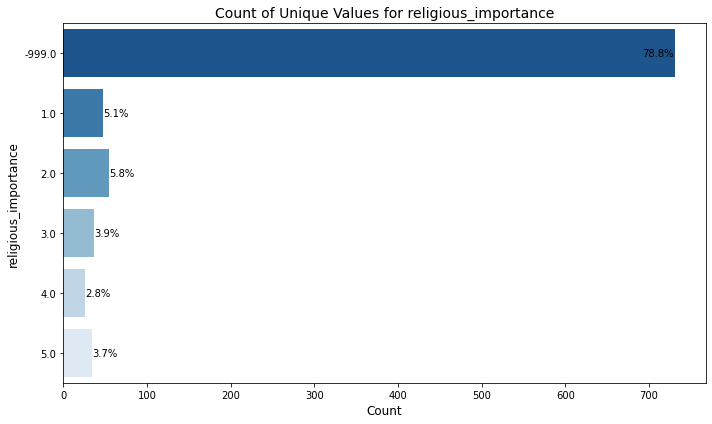

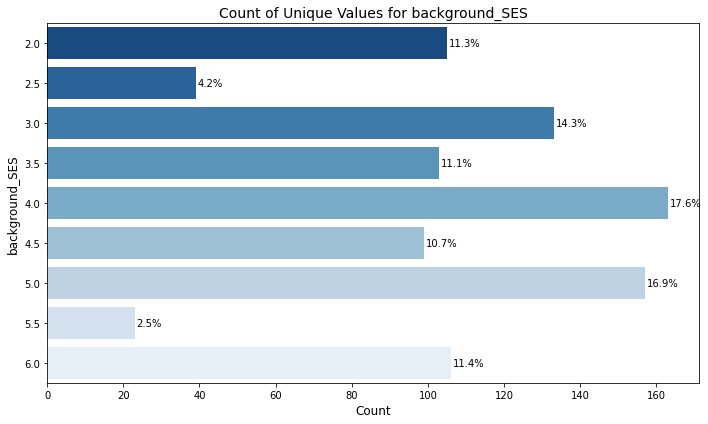

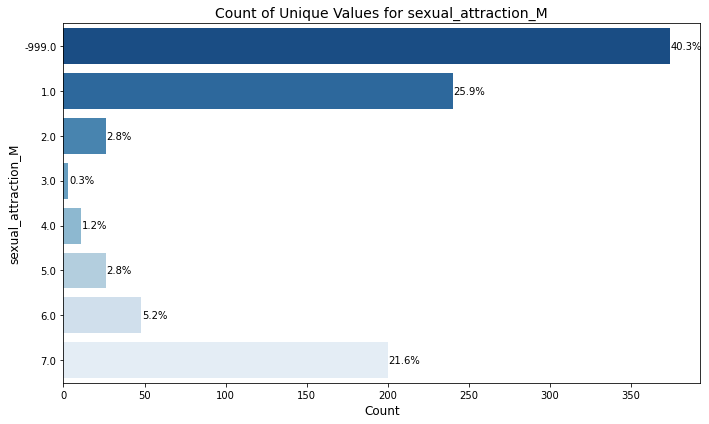

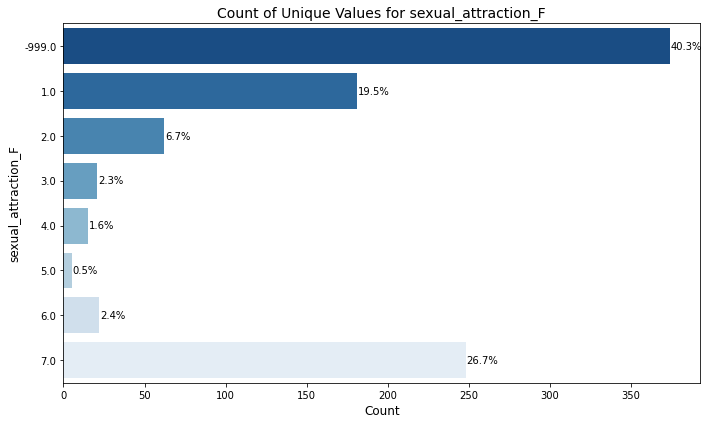

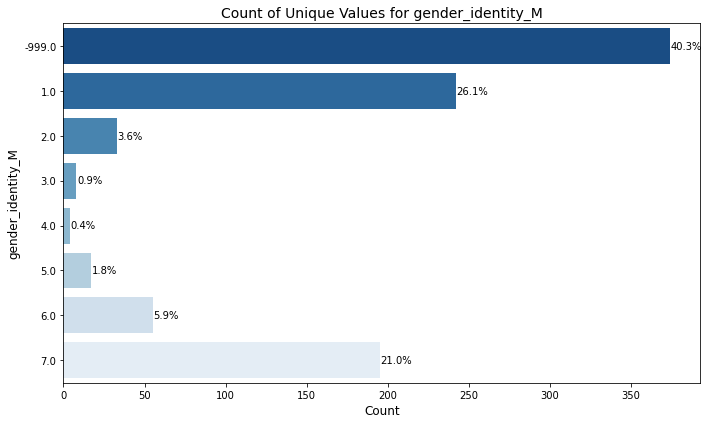

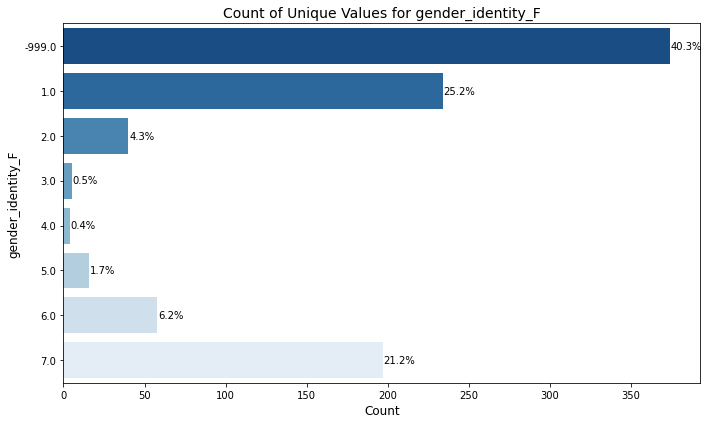

In [7]:
for col in df3.columns:
    plt.figure(figsize=(10, 6))   
    ax = sns.countplot(y=col, data=df3, palette="Blues_r")   
    plt.title(f'Count of Unique Values for {col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    total = len(df3[col])
    
   
    for p in ax.patches:
        count = int(p.get_width()) 
        percentage = f'{100 * count / total:.1f}%'  

       
        if p.get_width() > total * 0.5:
            ax.text(p.get_width() - 1, p.get_y() + p.get_height() / 2, percentage, 
                    ha='right', va='center', fontsize=10, color='black') 
        else:
            ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, percentage, 
                    ha='left', va='center', fontsize=10, color='black') 
    
   
    if col == 'Age':
        locs, labels = plt.yticks()
        plt.yticks(locs[::3], labels[::3], fontsize=10)
  
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

## Correlation Matrix 

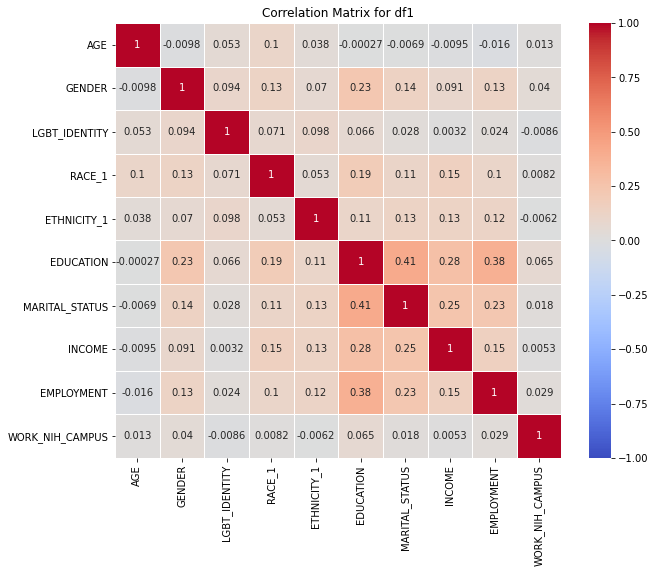

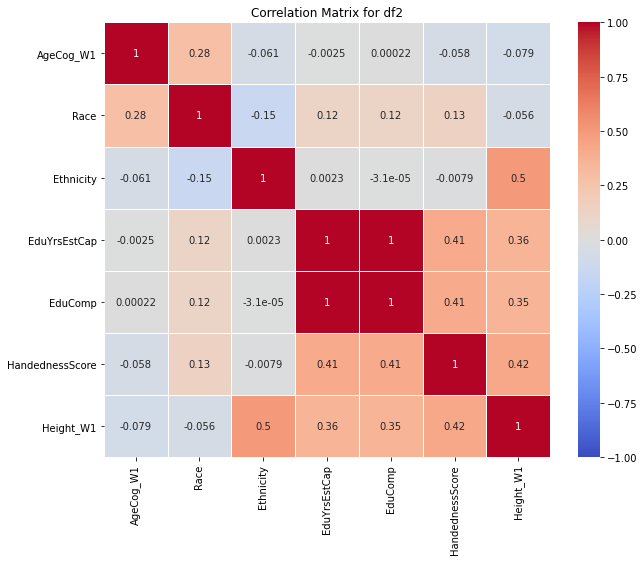

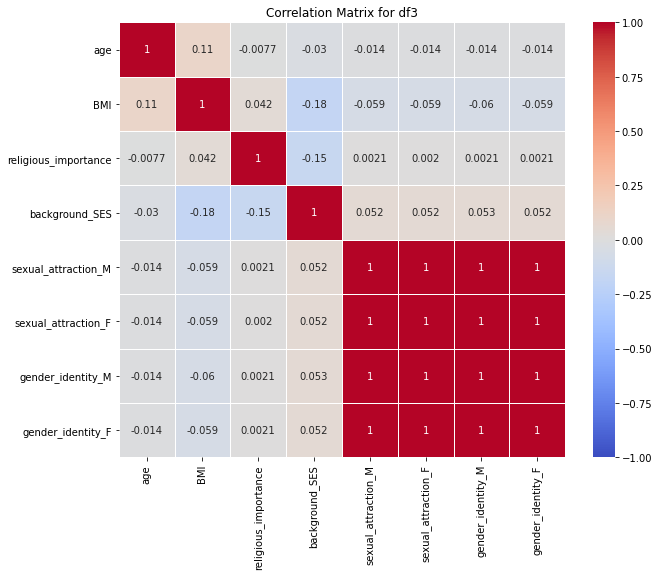

In [8]:
def plot_corr_matrix(df, title):
    plt.figure(figsize=(10, 8)) 
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    
    # Set the ticks
    plt.xticks(rotation=90)  
    plt.yticks(rotation=0)   
    
    plt.title(title)
    plt.show()

plot_corr_matrix(df1, "Correlation Matrix for df1")
plot_corr_matrix(df2, "Correlation Matrix for df2")
plot_corr_matrix(df3, "Correlation Matrix for df3")

### SUDA SCORE DATASET 1 

In [9]:
SUDA_df1 = pd.read_csv('sudaresult_dataset1.csv')
SUDA_df1 = SUDA_df1.sort_index()


### SUDA SCORE DATASET 2 
 

In [10]:
SUDA_df2 = pd.read_csv('sudaresult_dataset2.csv')
SUDA_df2 = SUDA_df2.sort_index()

### SUDA SCORE DATASET 3

In [11]:
SUDA_df3 = pd.read_csv('sudaresult_dataset3.csv')
SUDA_df3 = SUDA_df3.sort_index()

### RIG DATASET 1

In [12]:
PIF_D1 = pd.read_csv('PIF_dataset1.csv')
PIF_D1 = PIF_D1.set_index('Unnamed: 0')
PIF_D1 = PIF_D1.sort_index()


### RIG DATASET 2

In [13]:
PIF_D2 = pd.read_csv('PIF_dataset2.csv')
PIF_D2 = PIF_D2.set_index('Unnamed: 0')
PIF_D2 = PIF_D2.sort_index()

### RIG DATASET 3

In [14]:
PIF_D3 = pd.read_csv('PIF_dataset3.csv')
PIF_D3 = PIF_D3.set_index('Unnamed: 0')
PIF_D3 = PIF_D3.sort_index()

### COMBINED RESULT DATASET 3

In [15]:
comb_D3 = pd.read_csv('combinedresult_dataset3.csv')
comb_D2 = pd.read_csv('combinedresult_dataset2.csv')
comb_D1 = pd.read_csv('combinedresult_dataset1.csv')

### Pearson Rank & Kendall's Tau Correlation Between SUDA & PIF 

#### Dataset 1

In [16]:
spearman_corr = SUDA_df1['dis-suda'].corr(PIF_D1['RIG'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Spearmann rank correlation: 0.5442601613185227


In [17]:
kendall_corr = SUDA_df1['dis-suda'].corr(PIF_D1['RIG'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: 0.3998553921621103


#### Dataset 2

In [18]:
spearman = SUDA_df2['dis-suda'].corr(PIF_D2['RIG'], method='spearman')
print(f"Spearmann rank correlation: {spearman}")

Spearmann rank correlation: 0.7641089350175523


In [19]:
kendall_corr = SUDA_df2['dis-suda'].corr(PIF_D2['RIG'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: 0.5826506433037443


#### Dataset 3 

In [20]:
spearman_corr = SUDA_df3['dis-suda'].corr(PIF_D3['RIG'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Spearmann rank correlation: 0.7526948655224424


In [21]:
kendall_corr = SUDA_df3['dis-suda'].corr(PIF_D3['RIG'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: 0.5646410515970067


## Pearson Rank & Kendall's Tau between K-Combined and PIF Overall score

In [23]:
def compute_cigs_for_combinations(df, comb_D):
    results = []
     
    for idx, row in tqdm(comb_D.iterrows(), total=comb_D.shape[0], desc="Computing CIGs and PIFs"):
     
        columns = row['Combination'].split(', ')
        df_subset = df[columns]
        
        cigs = pif.compute_cigs(df_subset)
        pif_95 = pif.compute_pif(cigs, 0.95)
        
        results.append({
            'Combination': row['Combination'],
            'PIF_95': pif_95
        })
    
    results_df = pd.DataFrame(results)   
    return results_df

### DATASET 3

In [24]:
PIF_COMB_df3 = compute_cigs_for_combinations(df3, comb_D3)
spearman_corr = comb_D3['Score'].corr(PIF_COMB_df3['PIF_95'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Computing CIGs and PIFs: 100%|██████████| 8100/8100 [04:19<00:00, 31.19it/s]

Spearmann rank correlation: -0.6188502129241553


In [25]:
kendall_corr = comb_D3['Score'].corr(PIF_COMB_df3['PIF_95'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: -0.45433832898407195


### DATASET 2

In [26]:
PIF_COMB_df2 = compute_cigs_for_combinations(df2, comb_D2)
spearman_corr = comb_D2['Score'].corr(PIF_COMB_df2['PIF_95'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Computing CIGs and PIFs: 100%|██████████| 219/219 [00:02<00:00, 85.85it/s] 

Spearmann rank correlation: 0.3682956246403148


In [27]:
kendall_corr = comb_D2['Score'].corr(PIF_COMB_df2['PIF_95'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: 0.2666810493506298


### DATASET 1

In [28]:
PIF_COMB_df1 = compute_cigs_for_combinations(df1, comb_D1)
spearman_corr = comb_D1['Score'].corr(PIF_COMB_df1['PIF_95'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Computing CIGs and PIFs: 100%|██████████| 1981/1981 [00:57<00:00, 34.38it/s]

Spearmann rank correlation: -0.8799781705052706


In [29]:
kendall_corr = comb_D1['Score'].corr(PIF_COMB_df1['PIF_95'], method='kendall')
print(f"Kendall's Tau rank correlation: {kendall_corr}")

Kendall's Tau rank correlation: -0.7314024966574326


## Pearson Rank & Kendall's Tau between K-Combined, PIF Overall score, Sum of SUDA

#### Compute SUDA for all combinations. 

In [ ]:
from itertools import combinations
import pandas as pd
from math import factorial
import logging
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
import time
import numpy as np

pd.options.mode.chained_assignment = None


def process_combinations(args):
    """
    Process each combination of columns by finding MSUs and computing SUDA values.

    :param args: Tuple of dataframe, column combinations, aggregation methods, and attributes count.
    :return: Updated dataframe with MSU and SUDA calculations.
    """
    dataframe, columns, i, aggregations, att, factorials = args
    groups = list(combinations(columns, i))
    return find_msu(dataframe, groups, aggregations, att, factorials)


def find_msu(dataframe, groups, aggregations, att, factorials, wildcard_value=-999):
    """
    Find and score each Minimal Sample Unique (MSU) within the dataframe for the specified groups,
    filtering out rows where more than half of the columns contain a wildcard value.

    :param dataframe: the complete dataframe of data to score.
    :param groups: an array of arrays for each group of columns to test for uniqueness.
    :param aggregations: an array of aggregation methods to use for the results.
    :param att: the total number of attributes (QIDs) in the dataset.
    :param factorials: precomputed dictionary of factorials for efficiency.
    :param wildcard_value: the value used to identify wildcards/unknown values (default is -999).
    :return: Dataframe with MSU and SUDA values computed.
    """
    
    # Filter out rows with excessive wildcard values
    total_columns = len(dataframe.columns)
    wildcard_counts = (dataframe == wildcard_value).sum(axis=1)
    threshold = total_columns / 2
    dataframe = dataframe[wildcard_counts <= threshold]

    df_updates = []

    for nple in tqdm(groups, desc="Processing groups", leave=False):
        nple = list(nple)
        cols = nple.copy()
        cols.append('fK')

        # Group by the selected columns and count occurrences
        value_counts = dataframe[nple].groupby(nple, sort=False).size()

        if 1 in value_counts.values:
            df_value_counts = pd.DataFrame(value_counts)
            df_value_counts = df_value_counts.reset_index()
            df_value_counts.columns = cols

            # Compute fM, MSU, and SUDA values
            df_value_counts['fM'] = 0
            df_value_counts['suda'] = 0
            df_value_counts.loc[df_value_counts['fK'] == 1, ['fM', 'msu', 'suda']] = \
                [1, len(nple), factorials[len(nple)]]

            # Merge results back into the main dataframe
            df_update = pd.merge(dataframe, df_value_counts, on=nple, how='left')
            df_updates.append(df_update)

    if df_updates:
        df_updates = pd.concat(df_updates)

    return df_updates


pd.set_option('display.float_format', '{:.6f}'.format)


def suda_calculation(dataframe, max_msu=2, sample_fraction=0.30, columns=None):
    """
    Calculate SUDA scores for the given dataframe.

    :param dataframe: Input dataframe for which SUDA needs to be calculated.
    :param max_msu: Maximum MSU size to consider. Default is 2.
    :param sample_fraction: Fraction of the sample to use for DIS calculation. Default is 0.30.
    :param columns: Optional list of columns to group by. If None, uses all columns.
    :return: Dataframe with SUDA and MSU values.
    """
    logger = logging.getLogger("suda")
    logging.basicConfig()

    # Start total timing
    total_start_time = time.time()

    if columns is None:
        columns = dataframe.columns.tolist()

    logger.info(f"Dataframe columns: {list(dataframe.columns)}")
    logger.info(f"Columns to group by: {columns}")

    missing_columns = [col for col in columns if col not in dataframe.columns]
    if missing_columns:
        logger.error(f"Columns not found in dataframe: {missing_columns}")
        raise ValueError(f"Columns not found in dataframe: {missing_columns}")

    dataframe = dataframe.dropna(subset=columns)

    # Convert columns to categorical where appropriate
    for col in columns:
        if dataframe[col].nunique() < 600:
            dataframe[col] = dataframe[col].astype(pd.CategoricalDtype(ordered=True))

    att = min(len(columns), 20)  # Limit the number of attributes to 20
    aggregations = {'msu': 'min', 'suda': 'sum', 'fK': 'min', 'fM': 'sum'}
    for column in dataframe.columns:
        aggregations[column] = 'max'

    # Precompute factorial values for efficiency
    factorial_start_time = time.time()
    # Check if att - i is non-negative before computing the factorial
    factorials = {i: factorial(att - i) for i in range(1, max_msu + 1) if (att - i) >= 0}
    print(f"Factorial precomputation time: {time.time() - factorial_start_time:.2f} seconds")

    # Parallel processing with tqdm progress bar
    parallel_start_time = time.time()
    with Pool(processes=cpu_count()) as pool:
        results = list(tqdm(pool.imap_unordered(process_combinations, [
            (dataframe, columns, i, aggregations, att, factorials) for i in range(1, max_msu + 1)
        ]), total=max_msu, desc="Processing combinations"))
    print(f"Parallel processing time: {time.time() - parallel_start_time:.2f} seconds")

    results = [result for result in results if len(result) != 0]

    if not results:
        logger.info("No special uniques found")
        dataframe["suda"] = 0
        dataframe["msu"] = None
        dataframe['fK'] = None
        dataframe['fM'] = None
        print(f"Total calculation time: {time.time() - total_start_time:.2f} seconds")
        return dataframe

    # Ensure fM and SUDA columns exist and merge results
    for result in results:
        if 'fM' not in result.columns:
            result['fM'] = 0
            result['suda'] = 0

    dataframe['fM'] = 0
    dataframe['suda'] = 0

    # Concatenation with tqdm progress bar
    concat_start_time = time.time()
    results.append(dataframe)
    results = pd.concat(results).groupby(level=0).agg(aggregations)
    print(f"Concatenation and aggregation time: {time.time() - concat_start_time:.2f} seconds")

    # Vectorized DIS-SUDA calculation (with batching and progress bar)
    dis_start_time = time.time()
    tqdm.write("Calculating DIS-SUDA in batches...")

    # Calculate DIS
    value_counts = dataframe[columns].value_counts(dropna=False)
    num_unique_rows = len(value_counts[value_counts == 1])
    U = num_unique_rows

    duplicates = dataframe.duplicated(keep=False)
    P = dataframe[duplicates].shape[0]

    DIS = (U * sample_fraction) / (U * sample_fraction + P * (1 - sample_fraction))

    # Set initial DIS-SUDA to 0
    results['dis-suda'] = 0

    # Calculate the dis_value
    dis_value = DIS / results.suda.sum()

    # Apply the DIS-SUDA calculation in batches to avoid memory issues
    batch_size = 10000  # Adjust the batch size depending on your available memory
    suda_positive_index = results[results['suda'] > 0].index
    num_batches = int(np.ceil(len(suda_positive_index) / batch_size))

    # Progress bar for batching
    for i in tqdm(range(num_batches), desc="Batching DIS-SUDA calculation"):
        batch_index = suda_positive_index[i * batch_size:(i + 1) * batch_size]
        results.loc[batch_index, 'dis-suda'] = results.loc[batch_index, 'suda'] * dis_value

    print(f"DIS-SUDA calculation time: {time.time() - dis_start_time:.2f} seconds")

    # End total timing
    print(f"Total calculation time: {time.time() - total_start_time:.2f} seconds")

    return results



In [ ]:
def compute_suda_for_combinations(df, comb_D, max_msu=5):

    results = []

    # Iterate over each combination of columns in comb_D
    for idx, row in tqdm(comb_D.iterrows(), total=comb_D.shape[0], 
                         desc=f"Processing row {0}/{comb_D.shape[0]}"):
        
        # Update tqdm description to show current progress (row number out of total)
        tqdm.write(f"Processing combination {idx+1} of {comb_D.shape[0]}: {row['Combination']}")
        
        # Get the list of columns for the current combination
        columns = row['Combination'].split(', ')
        
        # Create a subset of the dataframe with only the selected columns
        df_subset = df[columns]
        
        # Calculate SUDA scores for the subset
        suda_df = suda_calculation(df_subset, max_msu=max_msu, columns=columns)
        
        # Calculate the sum of SUDA scores for this combination
        suda_sum = suda_df['suda'].sum()

        # Store the result for the current combination
        results.append({
            'Combination': row['Combination'],
            'SUDA_Sum': suda_sum
        })
    
    # Convert the results to a DataFrame and return
    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
#SUDA_sum_dataset1 = compute_suda_for_combinations(df1, comb_D1)

In [31]:
#SUDA_sum_dataset1.to_csv('SUDA_sum_dataset1.csv')

## SUDA SUM + K-COMBINED DATASET 1

In [30]:
SUDA_sum_dataset1 = pd.read_csv('SUDA_sum_dataset1.csv')
SUDA_sum_dataset2 = pd.read_csv('SUDA_sum_dataset2.csv')
SUDA_sum_dataset3 = pd.read_csv('SUDA_sum_dataset3.csv')


In [31]:
spearman_corr = comb_D1['Score'].corr( SUDA_sum_dataset1['SUDA_Sum'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Spearmann rank correlation: -0.8058684469840804


## SUDA SUM + K-COMBINED DATASET 2

In [32]:
#SUDA_sum_dataset2 = compute_suda_for_combinations(df2, comb_D2)

In [33]:
#SUDA_sum_dataset2.to_csv('SUDA_sum_dataset2.csv')

In [34]:
spearman_corr = comb_D2['Score'].corr( SUDA_sum_dataset2['SUDA_Sum'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Spearmann rank correlation: 0.27135803770953504


## SUDA SUM + K-COMBINED DATASET 3 

In [35]:
#SUDA_sum_dataset3 = compute_suda_for_combinations(df3, comb_D3)

In [36]:
#SUDA_sum_dataset3.to_csv('SUDA_sum_dataset3.csv')

In [37]:
spearman_corr = comb_D3['Score'].corr( SUDA_sum_dataset3['SUDA_Sum'], method='spearman')
print(f"Spearmann rank correlation: {spearman_corr}")

Spearmann rank correlation: -0.5809064710299551


In [38]:
comb_D3['Score']
SUDA_sum_dataset3['SUDA_Sum']
PIF_COMB_df3['PIF_95']

0        0.036045
1        0.028596
2        0.017731
3        0.029802
4        0.019307
          ...    
8095    11.234922
8096    13.261988
8097    11.302371
8098     9.138475
8099    13.606241
Name: PIF_95, Length: 8100, dtype: float64

# Correlation between all datasets 

### Correlation matrix between all DS 3

In [39]:
correlation_df = pd.DataFrame({
    'K-Combined': comb_D3['Score'],
    'SUDA_Sum': SUDA_sum_dataset3['SUDA_Sum'],
    'PIF_95': PIF_COMB_df3['PIF_95']
})


correlation_df = correlation_df.fillna(0)
correlation_matrix = correlation_df.corr(method='spearman')
print("Spearman Correlation Matrix:")
correlation_matrix

Spearman Correlation Matrix:


,K-Combined,SUDA_Sum,PIF_95
K-Combined,1.000000,-0.578413,-0.616668
SUDA_Sum,-0.578413,1.000000,0.845113
PIF_95,-0.616668,0.845113,1.000000


## SUM of SUDA vs. K-Combined

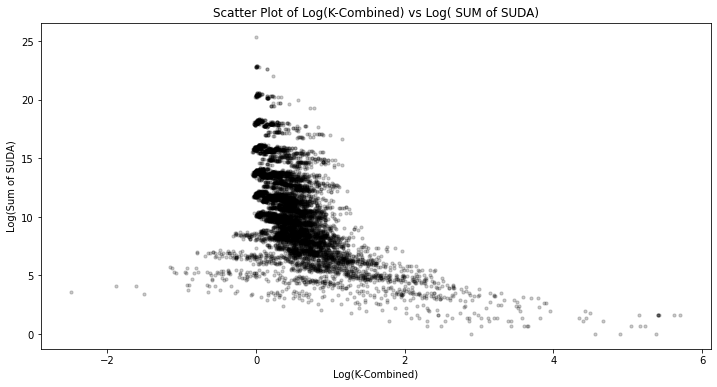

In [56]:
# Apply log transformation to the columns
log_comb_D3_score = np.log(comb_D3['Score'])
log_SUDA_sum_dataset3_suda_sum = np.log(SUDA_sum_dataset3['SUDA_Sum'])

# Creating a scatter plot with log-transformed data
plt.figure(figsize=(12, 6))
plt.scatter(log_comb_D3_score, log_SUDA_sum_dataset3_suda_sum, color='black', s=10, alpha = 0.2)  # 's' controls the size of the points
plt.title('Scatter Plot of Log(K-Combined) vs Log( SUM of SUDA)')
plt.xlabel('Log(K-Combined)')
plt.ylabel('Log(Sum of SUDA)')
plt.show()

## SUM of SUDA vs. PIF 

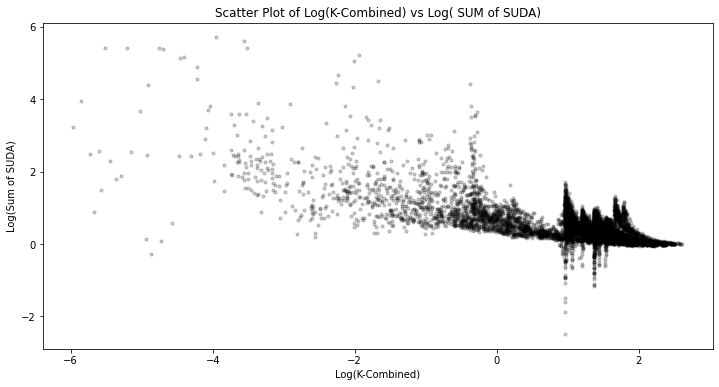

In [58]:
# Apply log transformation to the columns
log_PIF3 = np.log(PIF_COMB_df3['PIF_95'])
log_comb_D3_score = np.log(comb_D3['Score'])

# Creating a scatter plot with log-transformed data
plt.figure(figsize=(12, 6))
plt.scatter(log_PIF3, log_comb_D3_score, color='black', s=10, alpha = 0.2)  # 's' controls the size of the points
plt.title('Scatter Plot of Log(K-Combined) vs Log( SUM of SUDA)')
plt.xlabel('Log(K-Combined)')
plt.ylabel('Log(Sum of SUDA)')
plt.show()

## PIF vs. K-Combined

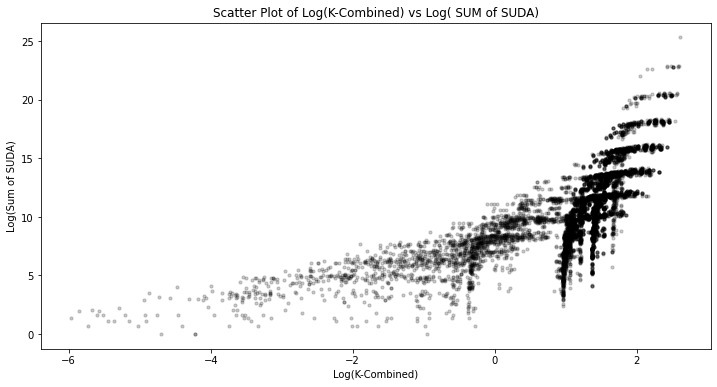

In [59]:
# Apply log transformation to the columns
log_PIF3 = np.log(PIF_COMB_df3['PIF_95'])
log_SUDA_sum_dataset3_suda_sum = np.log(SUDA_sum_dataset3['SUDA_Sum'])

# Creating a scatter plot with log-transformed data
plt.figure(figsize=(12, 6))
plt.scatter(log_PIF3, log_SUDA_sum_dataset3_suda_sum, color='black', s=10, alpha = 0.2)  # 's' controls the size of the points
plt.title('Scatter Plot of Log(K-Combined) vs Log( SUM of SUDA)')
plt.xlabel('Log(K-Combined)')
plt.ylabel('Log(Sum of SUDA)')
plt.show()

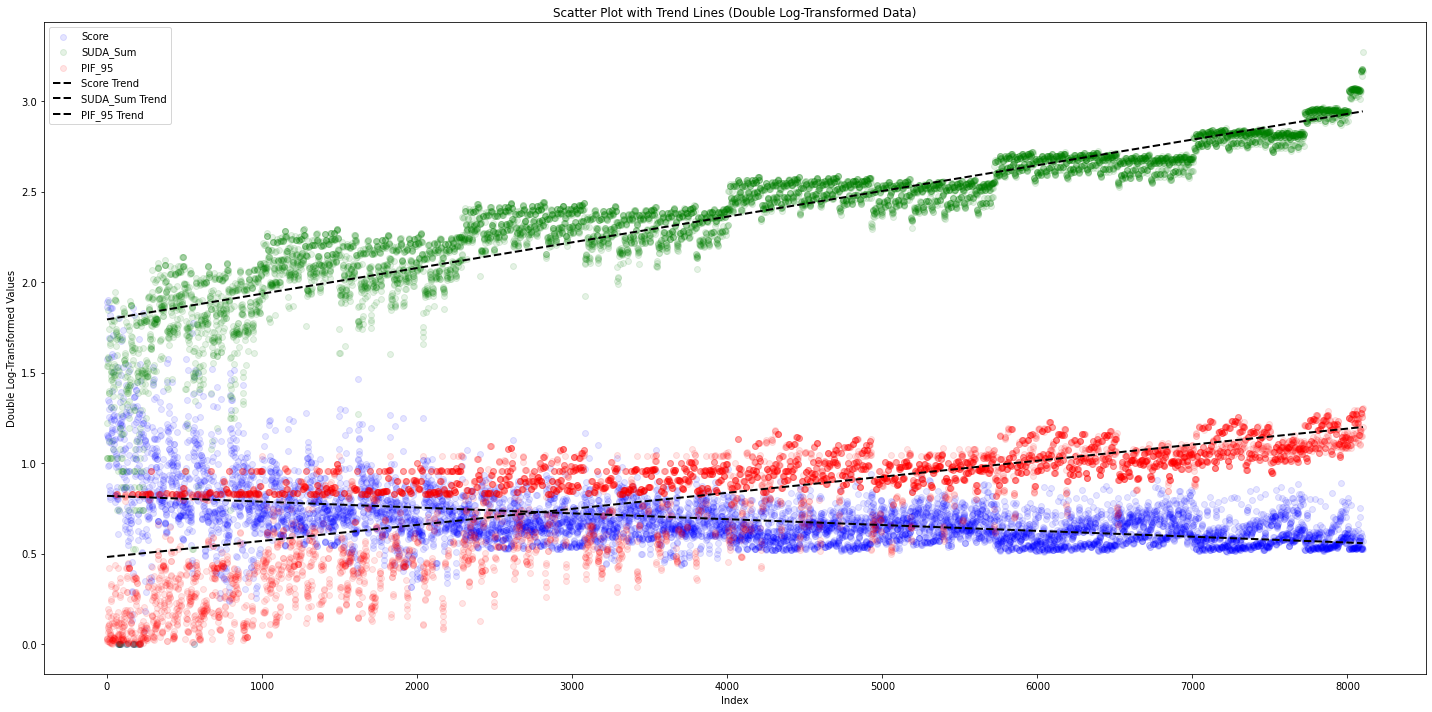

In [129]:
import numpy as np
import matplotlib.pyplot as plt


scatter_df = pd.DataFrame({
    'Score': comb_D3['Score'],
    'SUDA_Sum': SUDA_sum_dataset3['SUDA_Sum'],
    'PIF_95': PIF_COMB_df3['PIF_95']
})


scatter_df.replace([float('inf'), -float('inf')], 0, inplace=True)
scatter_df.fillna(0, inplace=True)


double_log_transformed_data = scatter_df.applymap(lambda x: np.log1p(np.log1p(x)))


def add_trend_line(x, y, color, label):
   
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--',color='black', label=f"{label} Trend", linewidth=2)


plt.figure(figsize=(20, 10))


plt.scatter(double_log_transformed_data.index, double_log_transformed_data['Score'], label='Score', color='blue', alpha=0.1)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], label='SUDA_Sum', color='green', alpha=0.1)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], label='PIF_95', color='red', alpha=0.1)


add_trend_line(double_log_transformed_data.index, double_log_transformed_data['Score'], 'blue', 'Score')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], 'green', 'SUDA_Sum')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], 'red', 'PIF_95')


plt.title('Scatter Plot with Trend Lines (Double Log-Transformed Data)')
plt.xlabel('Index')
plt.ylabel('Double Log-Transformed Values')


plt.legend()


plt.tight_layout()
plt.show()



### Correlation matrix between all DS 1

In [105]:
correlation_df = pd.DataFrame({
    'K-Combined': comb_D1['Score'],
    'SUDA_Sum': SUDA_sum_dataset1['SUDA_Sum'],
    'PIF_95': PIF_COMB_df1['PIF_95']
})


correlation_df = correlation_df.fillna(0)
correlation_matrix = correlation_df.corr(method='spearman')
print("Spearman Correlation Matrix:")
correlation_matrix

Spearman Correlation Matrix:


,K-Combined,SUDA_Sum,PIF_95
K-Combined,1.000000,-0.805868,-0.879978
SUDA_Sum,-0.805868,1.000000,0.847482
PIF_95,-0.879978,0.847482,1.000000


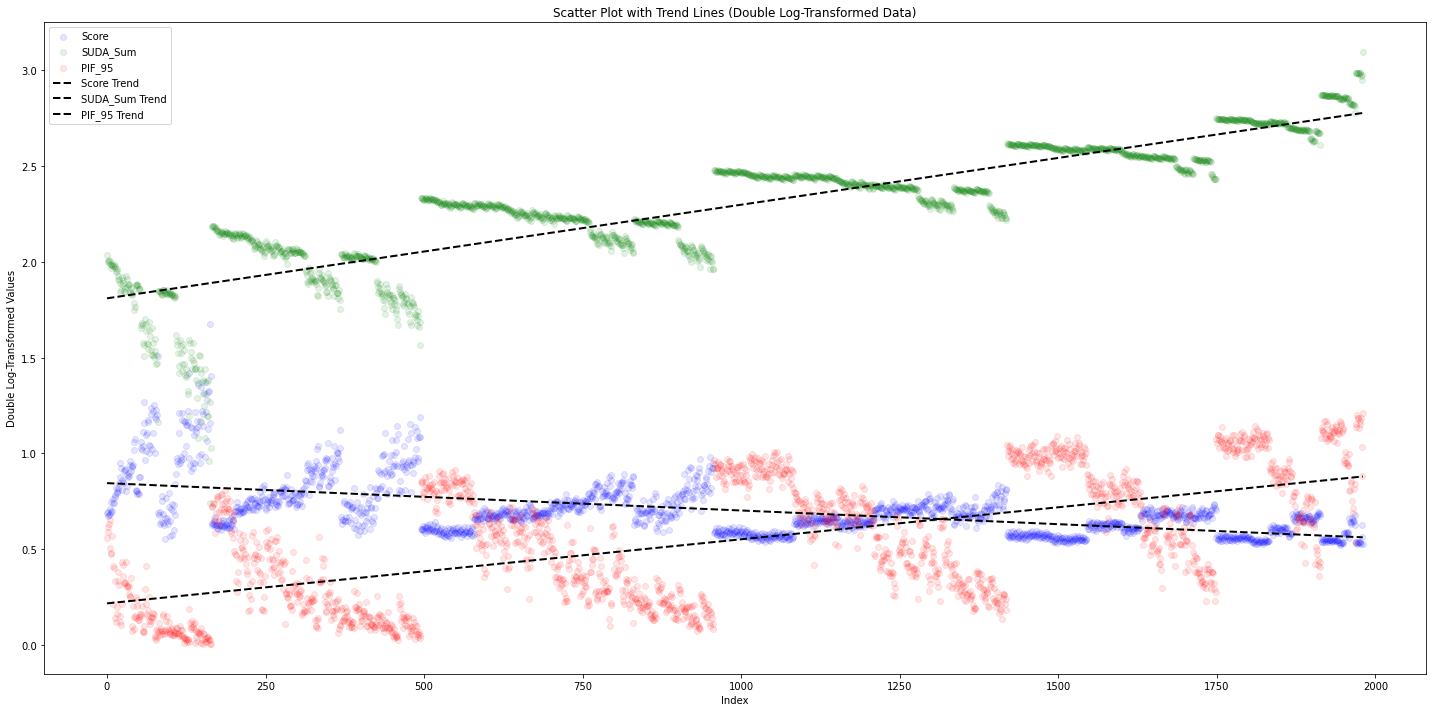

In [148]:
import numpy as np
import matplotlib.pyplot as plt


scatter_df = pd.DataFrame({
    'Score': comb_D1['Score'],
    'SUDA_Sum': SUDA_sum_dataset1['SUDA_Sum'],
    'PIF_95': PIF_COMB_df1['PIF_95']
})


scatter_df.replace([float('inf'), -float('inf')], 0, inplace=True)
scatter_df.fillna(0, inplace=True)


double_log_transformed_data = scatter_df.applymap(lambda x: np.log1p(np.log1p(x)))


def add_trend_line(x, y, color, label):
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--',color='black', label=f"{label} Trend", linewidth=2)


plt.figure(figsize=(20, 10))


plt.scatter(double_log_transformed_data.index, double_log_transformed_data['Score'], label='Score', color='blue', alpha=0.1)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], label='SUDA_Sum', color='green', alpha=0.1)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], label='PIF_95', color='red', alpha=0.1)


add_trend_line(double_log_transformed_data.index, double_log_transformed_data['Score'], 'blue', 'Score')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], 'green', 'SUDA_Sum')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], 'red', 'PIF_95')


plt.title('Scatter Plot with Trend Lines (Double Log-Transformed Data)')
plt.xlabel('Index')
plt.ylabel('Double Log-Transformed Values')


plt.legend()


plt.tight_layout()
plt.show()



### Correlation matrix between all DS 2

In [110]:
correlation_df = pd.DataFrame({
    'K-Combined': comb_D2['Score'],
    'SUDA_Sum': SUDA_sum_dataset2['SUDA_Sum'],
    'PIF_95': PIF_COMB_df2['PIF_95']
})


correlation_df = correlation_df.fillna(0)
correlation_matrix = correlation_df.corr(method='spearman')
print("Spearman Correlation Matrix:")
correlation_matrix

Spearman Correlation Matrix:


,K-Combined,SUDA_Sum,PIF_95
K-Combined,1.000000,0.271358,0.368296
SUDA_Sum,0.271358,1.000000,0.859340
PIF_95,0.368296,0.859340,1.000000


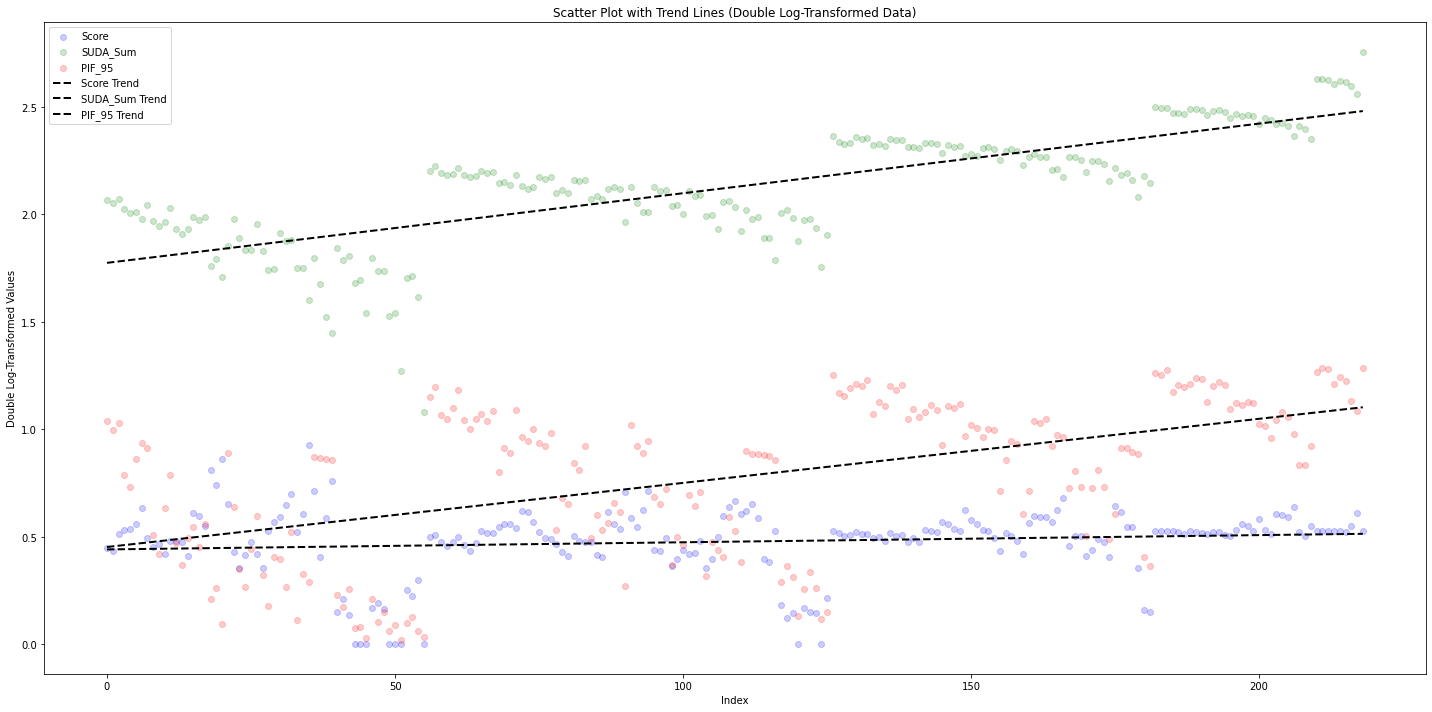

In [159]:
scatter_df = pd.DataFrame({
    'Score': comb_D2['Score'],
    'SUDA_Sum': SUDA_sum_dataset2['SUDA_Sum'],
    'PIF_95': PIF_COMB_df2['PIF_95']
})


scatter_df.replace([float('inf'), -float('inf')], 0, inplace=True)
scatter_df.fillna(0, inplace=True)


double_log_transformed_data = scatter_df.applymap(lambda x: np.log1p(np.log1p(x)))


def add_trend_line(x, y, color, label):
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--',color='black', label=f"{label} Trend", linewidth=2)


plt.figure(figsize=(20, 10))


plt.scatter(double_log_transformed_data.index, double_log_transformed_data['Score'], label='Score', color='blue', alpha=0.2)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], label='SUDA_Sum', color='green', alpha=0.2)
plt.scatter(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], label='PIF_95', color='red', alpha=0.2)


add_trend_line(double_log_transformed_data.index, double_log_transformed_data['Score'], 'blue', 'Score')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['SUDA_Sum'], 'green', 'SUDA_Sum')
add_trend_line(double_log_transformed_data.index, double_log_transformed_data['PIF_95'], 'red', 'PIF_95')


plt.title('Scatter Plot with Trend Lines (Double Log-Transformed Data)')
plt.xlabel('Index')
plt.ylabel('Double Log-Transformed Values')


plt.legend()


plt.tight_layout()
plt.show()



In [161]:
double_log_transformed_data

,Score,SUDA_Sum,PIF_95
0,0.449839,2.066572,1.037710
1,0.432382,2.054288,0.998384
2,0.512087,2.073635,1.030599
3,0.533680,2.025963,0.785871
4,0.535344,2.007426,0.733674
...,...,...,...
214,0.525947,2.621432,1.242741
215,0.523365,2.615052,1.224505
216,0.549093,2.597504,1.132695
217,0.608605,2.562338,1.083899


In [150]:
SUDA_sum_dataset2

,Unnamed: 0,Combination,SUDA_Sum
0,0,"AgeCog_W1, Height_W1, EduYrsEstCap",989
1,1,"AgeCog_W1, Height_W1, EduComp",898
2,2,"AgeCog_W1, Height_W1, HandednessScore",1046
3,3,"AgeCog_W1, Height_W1, Race",722
4,4,"AgeCog_W1, Height_W1, Ethnicity",628
...,...,...,...
214,214,"AgeCog_W1, Height_W1, EduYrsEstCap, Handedness...",346418
215,215,"AgeCog_W1, Height_W1, EduComp, HandednessScore...",317400
216,216,"AgeCog_W1, EduYrsEstCap, EduComp, HandednessSc...",250240
217,217,"Height_W1, EduYrsEstCap, EduComp, HandednessSc...",157328


In [149]:
comb_D2

,Combination,Unique Rows,Unique Rows Excluding Columns,Score
0,"AgeCog_W1, Height_W1, EduYrsEstCap",438,125,0.764840
1,"AgeCog_W1, Height_W1, EduComp",432,150,0.717593
2,"AgeCog_W1, Height_W1, HandednessScore",436,45,0.951835
3,"AgeCog_W1, Height_W1, Race",330,122,1.024242
4,"AgeCog_W1, Height_W1, Ethnicity",300,151,1.030000
...,...,...,...,...
214,"AgeCog_W1, Height_W1, EduYrsEstCap, Handedness...",460,1,0.997826
215,"AgeCog_W1, Height_W1, EduComp, HandednessScore...",460,5,0.989130
216,"AgeCog_W1, EduYrsEstCap, EduComp, HandednessSc...",420,7,1.078571
217,"Height_W1, EduYrsEstCap, EduComp, HandednessSc...",350,1,1.311429


<AxesSubplot:>

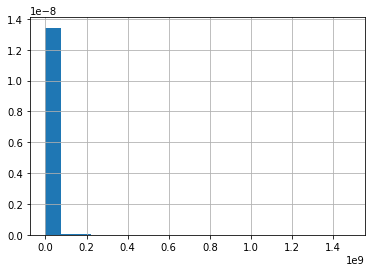

In [157]:
scatter_df['SUDA_Sum'].hist(bins = 20, density=True)

In [155]:
SUDA_sum_dataset1

,Unnamed: 0,Combination,SUDA_Sum
0,0,"AGE, INCOME, LANGUAGE",773
1,1,"AGE, INCOME, RACE_1",623
2,2,"AGE, INCOME, MARITAL_STATUS",597
3,3,"AGE, INCOME, EDUCATION",635
4,4,"AGE, INCOME, EMPLOYMENT",611
...,...,...,...
1976,1976,"AGE, INCOME, LANGUAGE, MARITAL_STATUS, EDUCATI...",143408640
1977,1977,"AGE, INCOME, RACE_1, MARITAL_STATUS, EDUCATION...",109763760
1978,1978,"AGE, LANGUAGE, RACE_1, MARITAL_STATUS, EDUCATI...",120941280
1979,1979,"INCOME, LANGUAGE, RACE_1, MARITAL_STATUS, EDUC...",71564400
